In [1]:
import pandas as pd

# Custom Libraries for saving excel and transformation of variables
import os
import sys
module_path = os.path.abspath(os.path.join('../../src/utils'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from custom_mmm_modelling import MMM_Modelling
from custom_modelling_plots import ModellingPlots
import time
import time
import pdb
import numpy as np

In [3]:
#for validation
def get_yhat(x_unscaled, coefs,intercept):
    
    y_hat = (x_unscaled * coefs).sum(axis=1) + intercept
    
    return y_hat
def get_diagnostics(y, yhat, X):
    # Calculate r2, rmse and log-liklihood values
    #yhat = model.predict(X)    
    
    SS_Residual = sum((y-yhat)**2)
    SS_Total = sum((y-np.mean(y))**2)
    r2 = 1 - ((float(SS_Residual))/SS_Total)
    adjusted_r_squared = 1 - ((1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1-1))
    
    
    mse = float(SS_Residual)/len(y)
    rmse = np.sqrt(mse)
    
    log_likelihood = np.log(mse)
    
    aic = - len(y) * log_likelihood + 2 * (X.shape[1]-1)
    
    bic = - 2 * log_likelihood + (X.shape[1]-1) * np.log(len(y))
    
    mape = abs((yhat/y)-1).mean()*100
    diag = pd.DataFrame()
    diag['diag'] = ['r2', 'adjusted_r_squared', 'rmse', 'mse', 'log_likelihood', 'aic', 'bic', 'mape']
    diag['value'] = [r2, adjusted_r_squared, rmse, mse, log_likelihood, aic, bic, mape]
    return diag

In [5]:
# To display numbers in decimal separated format
pd.options.display.float_format = '{:20,.5f}'.format

In [6]:
#to display 500 rows
pd.set_option('display.max_rows', 500)

In [7]:
media_dictionary = {'IMP' : 'Impression',
                    'SPEND' : 'Spend',
                    'VIEW_IMP' : 'Viewable Impression',
                    'CLK' : 'Click'}

In [8]:
# User Inputs
target_var = 'O_UNIT'

# standard names for folders are: new_customer_online, new_customer, sales_unit_online, sales_unit. 
# however the user can choose any folder name
# the folder would be created in models/manual_models
folder_name = 'sales_unit'

# standard names for folders are mix_media_metrics, impression, click, spend, viewable_impression
sub_folder = 'mix_media_metrics'

# input files
#input_data_path = "../../data/processed_input_data/modelling_stack_data_seasonality_Beauty.csv"#for beauty
input_data_path = "../../data/processed_input_data/Validation.csv"#for loreal
# Loading data dictionary
data_dict = pd.read_excel("../../data/input_data/WMG WAMM Project Data Dictionary_v13.xlsx")

In [9]:
# loading media hierarchy mapping
media_hier_click = pd.read_csv("../../data/input_data/media_hierarchy_CLK.csv")
media_hier_imp = pd.read_csv("../../data/input_data/media_hierarchy_IMP.csv")
media_hier_view_imp = pd.read_csv("../../data/input_data/media_hierarchy_VIEW_IMP.csv")
media_hier_spend = pd.read_csv("../../data/input_data/media_hierarchy_SPEND.csv")

media_hier = pd.concat([media_hier_click, media_hier_imp, media_hier_view_imp, media_hier_spend], axis= 0)

In [10]:
try:
    os.mkdir("../../models/{}/".format('manual'))
except:
    print("manual folder already exists")
    
folder_path = "../../models/manual/{}/".format(folder_name)
try:
    os.mkdir(folder_path)
except:
    print(folder_path + " folder already exists")
    
folder_path += sub_folder + "/"
try:
    os.mkdir(folder_path)
except:
    print(folder_path + " folder already exists")

manual folder already exists
../../models/manual/sales_unit/ folder already exists
../../models/manual/sales_unit/mix_media_metrics/ folder already exists


In [11]:
# To display numbers in decimal separated format
pd.options.display.float_format = '{:20,.5f}'.format

In [12]:
#loading data file
df = pd.read_csv(input_data_path, thousands= ",", na_values = " -   ")
df['index'] = pd.to_datetime(df['index']) # Formatting the date
df.set_index("index", inplace = True, drop= False) 

In [13]:
#del df['D_MOD_OVERALL_STORE_COUNT_PEG_CONT_LAG']

In [14]:
#df['D_MOD_OVERALL_STORE_COUNT_PEG_CONT_LAG']=df['D_MOD_OVERALL_STORE_COUNT_PEG_CONT'].shift(3)

In [15]:
os.getcwd()

'C:\\Users\\rohan.garg\\Documents\\Walmart 2021\\C-Curve\\CAT_BEAUTY_AVG - Updated_17nov2021\\folder structure(added flexibility to choose media metric)\\notebook\\modelling'

In [16]:
df.shape

(1158, 229)

In [17]:
df['M_INSTORE_TV_WALL_SPEND_CALC'] = 0

In [18]:
df['M_ON_DIS_ROS_SPEND'] = df['M_ON_DIS_ROS_SPEND_CALC']

In [19]:
df.index

DatetimeIndex(['2019-05-01', '2019-05-02', '2019-05-03', '2019-05-04',
               '2019-05-05', '2019-05-06', '2019-05-07', '2019-05-08',
               '2019-05-09', '2019-05-10',
               ...
               '2022-06-22', '2022-06-23', '2022-06-24', '2022-06-25',
               '2022-06-26', '2022-06-27', '2022-06-28', '2022-06-29',
               '2022-06-30', '2022-07-01'],
              dtype='datetime64[ns]', name='index', length=1158, freq=None)

### As soon as the object of class MMM_Modelling is created, folder would be created in the specified folder_path variable. The folder would follow the naming convention of date(yyyy-mm-dd)_model_outputs_v*. 

In [20]:
# Creating the modelling object
model_obj = MMM_Modelling(df, target_var, data_dict= data_dict,
                          output_path= folder_path, media_hier= media_hier,
                          comment= 'Media Mix Model')

\\?\C:\Users\rohan.garg\Documents\Walmart 2021\C-Curve\CAT_BEAUTY_AVG - Updated_17nov2021\folder structure(added flexibility to choose media metric)\models\manual\sales_unit\mix_media_metrics\2021-11-23_model_outputs_v5\01_modelling_details.txt


In [21]:
# Creating train test split
model_obj.create_train_test_split('2020-05-01', '2021-05-31', '2020-05-01', '2021-05-31')

<h1 style="color:brown">
To re-run multiple iterations, the user need not create the object (of class MMM_Modelling) multiple times (this would create a new folder every time the object is created.
    
    
Instead the code can be re-run from the below cell to continue new iteration (i.e. trying out variable/transformation changes)
</h1>

In [22]:
# media_variables = ['M_ON_DIS_AT_IMP_0_0_9_8_0',
# 'M_ON_DIS_CT_IMP_0_0_11_11_0',                   
# 'M_ON_DIS_ROS_IMP_1_0_11.6_3_0',
# 'M_ON_DIS_SEA_IMP_3_0_5_8_0',
# 'M_ON_DIS_HPLO_IMP_2_0_5_8_0',
# 'M_ON_DIS_KW_IMP_4_0_9_2_0',
# # 'M_SP_AB_CLK_0_0_1_9_0',
# 'M_SP_CLK_0_0_1_5_0',
# # 'M_SP_KWB_CLK_0_0_9_0.5_0',
# 'M_SBA_CLK_0_0_3_7_0',
# 'M_OFF_DIS_WN_DISPLAY_IMP_5_0_6_6_0',
# #'M_OFF_DIS_FB_IMP_8_0_6_1_0',
# #'M_OFF_DIS_PIN_IMP_5_0_3_8_0',
# 'M_OFF_DIS_SMEDIA_IMP_8_0_6_1_0',
# 'M_TV_WALL_IMP_0_0_11_9_0'
# ]

In [23]:
%load_ext autoreload
%autoreload 2

C-Curve Transformation : $$ X_{Transformed} = Log((\frac{X}{K*mean}) + 1) ---- (1) $$
$$ OR $$
$$ X_{Transformed} = Log((\frac{X + K*mean}{K*mean})) ---- (2)$$
$$ OR $$
$$ X_{Transformed} = Log({X + K*mean}) - Log({K*mean}) ---- (3)$$
In OLS Equation:
$$ Y = Intercept + coeff1* X1_{Transformed} + coeff2* X2_{Transformed} $$

Imputing Transformed equation, it /becomes : 

$$ Y = (Intercept - coef_{1} *Log({K_{1}*mean_{1}}) - coef_{2} *Log({K_{2}*mean_{2}}) )  + coef_{1} * Log({X1 + K_{1}*mean_{1}}) + coef_{2} * Log({X2 + K_{2}*mean_{2}}) $$

C-Curve Transformation first derivative w.r.t. K : $$ \frac{d(X_{Transformed})}{d(K)} = \frac{-X}{K * (X + K*mean)} $$

C-Curve Transformation : $$ X_{Transformed} = Log((\frac{X}{K*mean}) + 1) ---- (1) $$

In [24]:
# Variable selection

dummy_variables = [
                   'D_HOL_CHRISTMAS',
#                    'D_FIRST_DAY_MONTH',
#                     'D_HOL_PRE_CHRISTMAS',
                  'D_HOL_THANKSGIVING',
#    'D_HOL_MEMORIAL_DAY'
    
#  'D_MOD_TRIAL_BODY_SPRAY_SDK_14_square',
#  'D_MOD_NYX_POD_14_square',
#  'D_MOD_TREND_COSMETIC_MOD_14_square',
#  'D_MOD_BEST_SELLER_MOD_7_square',
    
                  ]





WMT=[

#1based on forward selection

#  'M_WMT_U_M_TV_RADIO_USGM_NATIONAL_IMP_20_3_3.1_12_0',




    
    


   
    
#2based on spends

    
    
#because they belong to L1=beauty category
#  'M_WMT_AFFILIATES_USGM_L1_CLK_4_0_1.4_12.8_0',
#  'M_WMT_SEM_USGM_L1_IMP_20_3_4_15_0'

 
    
    

    
    
]

media_variables = ['M_SEARCH_CLK_14_0_0_0_1.960931170220818',
 'M_ON_DIS_AT_IMP_8_2_0_0_1.535680468350162',
 'M_ON_DIS_CT_IMP_6_1_0_0_1.2408015564226482',
 'M_ON_DIS_KW_IMP_13_2_0_0_0.5035717328988814',
 'M_ON_DIS_HPLO_IMP_12_0_0_0_1.613161234595688',
 'M_ON_DIS_ROS_IMP_10_2_0_0_0.7381605245592329',
 'M_OFF_DIS_WN_DISPLAY_IMP_5_2_0_0_1.8652511830418543',
 'M_OFF_DIS_SMEDIA_IMP_6_0_0_0_0.9671153554493166',
 'M_INSTORE_TV_WALL_IMP_5_0_0_0_1.355880944995155'
                  ]

# media_variables = ['M_SEARCH_CLK_14_2_0_0_1.5',
#  'M_ON_DIS_AT_IMP_8_0_0_0_0',
#  'M_ON_DIS_CT_IMP_11_0_0_0_0',
#  'M_ON_DIS_KW_IMP_11_0_0_0_0.05',
#  'M_ON_DIS_HPLO_IMP_5_0_0_0_0.4',
#  'M_ON_DIS_ROS_IMP_5_0_0_0_0',
#  'M_OFF_DIS_WN_DISPLAY_IMP_1_0_0_0_0',
#  'M_OFF_DIS_SMEDIA_IMP_1_0_0_0_0',
# #  'M_INSTORE_TV_WALL_IMP_1_0_0_0_0'
#                   ]


# media_variables = ['M_SEARCH_CLK_4_0_0_0_2.4045801165885687',
#  'M_ON_DIS_AT_IMP_6_1.0_0_0_0.909415829308619',
#  'M_ON_DIS_CT_IMP_11_0_0_0_2.8849742096506708',
#  'M_ON_DIS_KW_IMP_6_0_0_0_0.18397816055074862',
#  'M_ON_DIS_HPLO_IMP_13_3.0_0_0_2.5382337474501555',
#  'M_ON_DIS_ROS_IMP_10_2.0_0_0_1.9671406390755448',
#  'M_OFF_DIS_WN_DISPLAY_IMP_13_3.0_0_0_2.3420597654118946',
#  'M_OFF_DIS_SMEDIA_IMP_5_3.0_0_0_0.10223631776630579',
#  'M_INSTORE_TV_WALL_IMP_6_3.0_0_0_2.461411373205318']
# # ['M_SEARCH_CLK_4_0_0_0_1.960931170220818',
# #  'M_ON_DIS_AT_IMP_8_2_0_0_1.535680468350162',
# #  'M_ON_DIS_CT_IMP_11_1_0_0_1.2408015564226482',
# #  'M_ON_DIS_KW_IMP_11_2_0_0_0.5035717328988814',
# #  'M_ON_DIS_HPLO_IMP_5_0_0_0_1.613161234595688',
# #  'M_ON_DIS_ROS_IMP_5_2_0_0_0.7381605245592329',
# #  'M_OFF_DIS_WN_DISPLAY_IMP_1_2_0_0_1.8652511830418543',
# #  'M_OFF_DIS_SMEDIA_IMP_1_0_0_0_0.9671153554493166',
# #  'M_INSTORE_TV_WALL_IMP_1_0_0_0_1.355880944995155'
# #                   ]

# 
# 14_0_0_0_1.960931170220818
other_variables = [
    
#      'O_UNIT_SARIMAX (3, 1, 2) (1, 0, 1, 7)',
#      'O_UNIT_SMA_DAY_7',
    'O_UNIT_SEASONALITY',
    'O_UNIT_TREND',
#     'PRICE'
    
]


# Selecting all the independent variables
all_independent_variables = media_variables+WMT + other_variables + dummy_variables 
# all_independent_variables = other_variables + dummy_variables
# all_independent_variables = other_variables

# create all the media transformations
model_obj.create_missing_media_transformations(media_variables+WMT, 
                                               trans_start_date= '2020-05-01', trans_end_date= '2021-05-31')

# Running the linear model and visualizing the results
# model_type will save the results of multiple model iterations
model_obj.create_model_results(X_vars= all_independent_variables, model_type= 'Manual Model 1')


model_obj.visualize_model_outputs('Manual Model 1', contribution_graph= False, add_residual= False, separate_validation= True,
                                  analyst_review= False, show_yaxis= False,
                                  )

Variables          Coefficient  \
0                                      INTERCEPT_TERM         18,836.55761   
1             M_SEARCH_CLK_14_0_0_0_1.960931170220818              3.06596   
2           M_ON_DIS_AT_IMP_8_2_0_0_1.535680468350162              0.03888   
3          M_ON_DIS_CT_IMP_6_1_0_0_1.2408015564226482              0.07395   
4         M_ON_DIS_KW_IMP_13_2_0_0_0.5035717328988814              0.13085   
5        M_ON_DIS_HPLO_IMP_12_0_0_0_1.613161234595688              0.00286   
6        M_ON_DIS_ROS_IMP_10_2_0_0_0.7381605245592329              0.08984   
7   M_OFF_DIS_WN_DISPLAY_IMP_5_2_0_0_1.86525118304...              0.02585   
8     M_OFF_DIS_SMEDIA_IMP_6_0_0_0_0.9671153554493166              0.03161   
9     M_INSTORE_TV_WALL_IMP_5_0_0_0_1.355880944995155             -0.00638   
10                                 O_UNIT_SEASONALITY              0.86731   
11                                       O_UNIT_TREND              0.26101   
12                                    D_HOL_CHRISTMAS        -35,713.85441   
13                                 D_HOL_THANKSGIVING        -28,004.99261   

                p-value         Significance           Elasticity  \
0               0.00000            100.00000              0.00000   
1               0.21300             78.70000              0.04620   
2               0.02200             97.80000              0.03534   
3               0.35600             64.40000              0.01939   
4               0.56800             43.20000              0.01124   
5               0.39000             61.00000              0.00142   
6               0.17100             82.90000              0.02296   
7               0.39200             60.80000              0.01276   
8               0.35300             64.70000              0.00566   
9               0.39500             60.50000             -0.00307   
10              0.00000            100.00000              0.00073   
11              0.00000            100.00000              0.25882   
12              0.00000            100.00000             -0.00284   
13              0.00000            100.00000             -0.00223   

    Standardized Coefficient  Relative Importance                  VIF  
0                    0.00000              0.00000              0.00000  
1                    0.05660              0.00420              3.59404  
2                    0.07280              0.00695              1.73833  
3                    0.03650              0.00175              2.72934  
4                    0.01940              0.00049              2.00397  
5                    0.02090              0.00057              1.03228  
6                    0.05730              0.00431              3.04798  
7                    0.03790              0.00188              3.42087  
8                    0.03790              0.00188              2.89381  
9                   -0.02800              0.00103              1.89038  
10                   0.72560              0.69054              1.01989  
11                   0.17110              0.03840              1.33970  
12                  -0.34220              0.15359              1.02071  
13                  -0.26830              0.09441              1.04079

Model Fit   Validation Metrics
MAPE                           5.38250              5.38250
R Square                      78.11796             78.11796
Adjusted R Sqaure             77.37328                     
AIC                        7,332.48007                     
BIC                        7,388.21987                     
Log Likelihood            -3,652.24003

In [25]:
# What do we do when we have negative coefficient or high correlation ?


In [26]:
# Add the current iteration to the iteration log excel file (iteration log would have details around 
# model-validation fit paramerters, ROI stats and coefficient summary)
model_obj.add_iteration_log('Manual Model 1')

Display Level  Contribution Share (%)  \
0               Onsite Display run-of-site                     15.1   
1                   Onsite Display keyword                      7.4   
2      Onsite Display contextual targeting                     12.8   
3              Offsite Display Social Media                     3.7   
4        Onsite Display audience targeting                     23.3   
5   Offsite Display Walmart Network Display                     8.4   
6                                    Search                    30.4   
7           Onsite Display homepage lockout                     0.9   
8                             Store TV Wall                    -2.0   
9                         Total Incremental                    15.2   
10                                     Base                    84.8   
11                                    Total                   100.0   

   Total Contribution Total Sales ($) Total Spend ($)  Spend Share (%)  \
0             288,587       1,686,979          16,668              2.9   
1             141,300         825,993          13,298              2.3   
2             243,780       1,425,055          31,445              5.4   
3              71,160         415,977          14,478              2.5   
4             443,830       2,594,479         120,311             20.7   
5             159,984         935,209          45,589              7.8   
6             580,561       3,393,763         303,286             52.1   
7              17,672         103,302          29,051              5.0   
8             -38,399        -224,468           8,328              1.4   
9           1,908,475      11,156,291         582,454            100.0   
10         10,657,131      62,297,945               0              0.0   
11         12,565,606      73,454,237         582,454              0.0   

     Raw Media  Raw Media Share (%)  Volume RoAS  Value RoAS ($)  
0    2,990,374                  7.2     1,731.39       10,121.14  
1      834,337                  2.0     1,062.59        6,211.55  
2    3,220,335                  7.7       775.27        4,531.96  
3    2,252,621                  5.4       491.51        2,873.18  
4   11,532,298                 27.6        368.9        2,156.48  
5    8,017,598                 19.2       350.92        2,051.37  
6      203,452                  0.5       191.42         1,119.0  
7    3,579,059                  8.6        60.83           355.6  
8    9,174,739                 21.9      -461.06       -2,695.18  
9   41,804,813                100.0       327.66         1,915.4  
10           0                  0.0          0.0             0.0  
11  41,804,813                  0.0          0.0             0.0

# Plots and Save files  (Excel Export)

C-Curve Transformation first derivative w.r.t. X : $$ \frac{d(X_{Transformed})}{d(X)} = scale_mean * \frac{1}{\frac{X}{mean} + K} $$

where scale mean = mean/transformed_mean

$$ If saturation constant = 0.05 (equals first derivative saturation) $$
becomes:
$$ Saturation point X = \frac{scale mean}{0.05} - K*mean $$

In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
%reload_ext autoreload

In [29]:
model_obj.set_plot_point_position(inf_pt_pos ='middle right',
                              sat_pt_pos = 'top right', thres_pt_pos = 'middle right', avg_pt_pos ='bottom right')
for i in media_variables:
    model_obj.plot_response_curve(i,model_label= 'Manual Model 1',
                              start_date= '2020-05-01', end_date= '2021-05-31',saturation_constant = 0.05,
                             show_xy_labels = False,
                            save_path= None, spend= True, save_excel= False,show_xyaxis_title = True,
                            saturation_calculator = 'logistic',threshold_calculator='logistic')
#     var, model_label, start_date, end_date, 

Variable  Total Days  On Air Days  \
0  M_SEARCH_CLK_14_0_0_0_1.960931170220818         396          396   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    396   

   Actual Average Point              Average  Threshold point  \
0                 513.8                513.8                0   

      Inflection Point     Saturation Point  
0                  0.0             24,140.1

Variable  Total Days  On Air Days  \
0  M_SEARCH_CLK_14_0_0_0_1.960931170220818         396          396   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    396   

   Actual Average Point (Spend)      Average (Spend)  Threshold point (Spend)  \
0                         765.9                765.9                      0.0   

   Inflection Point (Spend)  Saturation Point (Spend)  
0                       0.0                  35,985.7

Variable  Total Days  On Air Days  \
0  M_ON_DIS_AT_IMP_8_2_0_0_1.535680468350162         396          396   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    396   

   Actual Average Point              Average  Threshold point  \
0              29,122.0             29,122.0                0   

      Inflection Point     Saturation Point  
0                  0.0          1,161,855.4

Variable  Total Days  On Air Days  \
0  M_ON_DIS_AT_IMP_8_2_0_0_1.535680468350162         396          396   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    396   

   Actual Average Point (Spend)      Average (Spend)  Threshold point (Spend)  \
0                         303.8                303.8                      0.0   

   Inflection Point (Spend)  Saturation Point (Spend)  
0                       0.0                  12,121.1

Variable  Total Days  On Air Days  \
0  M_ON_DIS_CT_IMP_6_1_0_0_1.2408015564226482         396          396   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    396   

   Actual Average Point              Average  Threshold point  \
0               8,132.2              8,132.2                0   

      Inflection Point     Saturation Point  
0                  0.0            273,665.8

Variable  Total Days  On Air Days  \
0  M_ON_DIS_CT_IMP_6_1_0_0_1.2408015564226482         396          396   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    396   

   Actual Average Point (Spend)      Average (Spend)  Threshold point (Spend)  \
0                          79.4                 79.4                      0.0   

   Inflection Point (Spend)  Saturation Point (Spend)  
0                       0.0                   2,672.2

Variable  Total Days  On Air Days  \
0  M_ON_DIS_KW_IMP_13_2_0_0_0.5035717328988814         396          396   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    396   

   Actual Average Point              Average  Threshold point  \
0               2,106.9              2,106.9                0   

      Inflection Point     Saturation Point  
0                  0.0             39,240.5

Variable  Total Days  On Air Days  \
0  M_ON_DIS_KW_IMP_13_2_0_0_0.5035717328988814         396          396   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    396   

   Actual Average Point (Spend)      Average (Spend)  Threshold point (Spend)  \
0                          33.6                 33.6                      0.0   

   Inflection Point (Spend)  Saturation Point (Spend)  
0                       0.0                     625.4

Variable  Total Days  On Air Days  \
0  M_ON_DIS_HPLO_IMP_12_0_0_0_1.613161234595688         396          227   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    227   

   Actual Average Point              Average  Threshold point  \
0              15,766.8              9,038.0                0   

      Inflection Point     Saturation Point  
0                  0.0            775,030.1

Variable  Total Days  On Air Days  \
0  M_ON_DIS_HPLO_IMP_12_0_0_0_1.613161234595688         396          227   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    227   

   Actual Average Point (Spend)      Average (Spend)  Threshold point (Spend)  \
0                         128.0                 73.4                      0.0   

   Inflection Point (Spend)  Saturation Point (Spend)  
0                       0.0                   6,290.8

Variable  Total Days  On Air Days  \
0  M_ON_DIS_ROS_IMP_10_2_0_0_0.7381605245592329         396          396   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    396   

   Actual Average Point              Average  Threshold point  \
0               7,551.4              7,551.4                0   

      Inflection Point     Saturation Point  
0                  0.0            187,213.6

Variable  Total Days  On Air Days  \
0  M_ON_DIS_ROS_IMP_10_2_0_0_0.7381605245592329         396          396   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    396   

   Actual Average Point (Spend)      Average (Spend)  Threshold point (Spend)  \
0                          42.1                 42.1                      0.0   

   Inflection Point (Spend)  Saturation Point (Spend)  
0                       0.0                   1,043.5

Variable  Total Days  On Air Days  \
0  M_OFF_DIS_WN_DISPLAY_IMP_5_2_0_0_1.86525118304...         396          396   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    396   

   Actual Average Point              Average  Threshold point  \
0              20,246.5             20,246.5                0   

      Inflection Point     Saturation Point  
0                  0.0            955,610.8

Variable  Total Days  On Air Days  \
0  M_OFF_DIS_WN_DISPLAY_IMP_5_2_0_0_1.86525118304...         396          396   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    396   

   Actual Average Point (Spend)      Average (Spend)  Threshold point (Spend)  \
0                         115.1                115.1                      0.0   

   Inflection Point (Spend)  Saturation Point (Spend)  
0                       0.0                   5,433.8

Variable  Total Days  On Air Days  \
0  M_OFF_DIS_SMEDIA_IMP_6_0_0_0_0.9671153554493166         396          280   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    280   

   Actual Average Point              Average  Threshold point  \
0               8,045.1              5,688.4                0   

      Inflection Point     Saturation Point  
0                  0.0            212,833.3

Variable  Total Days  On Air Days  \
0  M_OFF_DIS_SMEDIA_IMP_6_0_0_0_0.9671153554493166         396          280   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    280   

   Actual Average Point (Spend)      Average (Spend)  Threshold point (Spend)  \
0                          51.7                 36.6                      0.0   

   Inflection Point (Spend)  Saturation Point (Spend)  
0                       0.0                   1,367.9

Variable  Total Days  On Air Days  \
0  M_INSTORE_TV_WALL_IMP_5_0_0_0_1.355880944995155         396          174   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    174   

   Actual Average Point              Average  Threshold point  \
0              52,728.4             23,168.5                0   

      Inflection Point     Saturation Point  
0                  0.0          1,243,250.8

Variable  Total Days  On Air Days  \
0  M_INSTORE_TV_WALL_IMP_5_0_0_0_1.355880944995155         396          174   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    174   

   Actual Average Point (Spend)      Average (Spend)  Threshold point (Spend)  \
0                          47.9                 21.0                      0.0   

   Inflection Point (Spend)  Saturation Point (Spend)  
0                       0.0                   1,128.6

In [30]:
add_plots_obj = ModellingPlots(model_obj)
media_vars_plot = ['M_SEARCH_CLK',
#  'M_ON_DIS_AT_IMP',
 'M_ON_DIS_CT_IMP',
 'M_ON_DIS_KW_IMP',
 'M_ON_DIS_HPLO_IMP',
 'M_ON_DIS_ROS_IMP',
 'M_OFF_DIS_WN_DISPLAY_IMP',
 'M_OFF_DIS_SMEDIA_IMP',
 'M_INSTORE_TV_WALL_IMP',
    
    
#  'M_WMT_U_M_TV_RADIO_USGM_NATIONAL_IMP',
    
#  'M_WMT_SEM_USGM_L1_IMP',
#  'M_WMT_AFFILIATES_USGM_L1_CLK',
    
#  'M_WMT_U_M_DIGITAL_USGM_NATIONAL_IMP',
#  'M_WMT_U_M_SMEDIA_FB_USGM_NATIONAL_IMP',
#  'M_WMT_DIGITAL_TAB_USGM_NATIONAL_IMP'
                  ]
add_plots_obj.plot_media_on_off_analysis('Manual Model 1',
                                         show_yaxis= True,
                                         on_air_start = '2020-05-01', 
                                         on_air_end= '2021-05-31', 
                                         on_air_vars= media_vars_plot)
# show_xy_labels= False,show_xyaxis_title=False,

In [31]:
model_obj.visualize_ROAS('Manual Model 1', start_date= '2020-05-01', end_date= '2020-05-31', media_level= 6,
                        roas_100_multiplication= False,custom_height = 900, custom_width = 1100, custom_space = -0.15,
                        custom_RoAS_size=15)

Display Level  Contribution Share (%)  \
0               Onsite Display run-of-site                     24.0   
1                   Onsite Display keyword                      5.3   
2              Offsite Display Social Media                     1.1   
3      Onsite Display contextual targeting                     15.0   
4        Onsite Display audience targeting                     26.2   
5   Offsite Display Walmart Network Display                     3.6   
6                                    Search                    24.3   
7           Onsite Display homepage lockout                     0.5   
8                             Store TV Wall                     0.0   
9                         Total Incremental                    14.0   
10                                     Base                    86.0   
11                                    Total                   100.0   

   Total Contribution Total Sales ($) Total Spend ($)  Spend Share (%)  \
0              35,102         200,163           2,806             10.0   
1               7,711          43,973             667              2.4   
2               1,653           9,428             176              0.6   
3              21,868         124,702           2,871             10.2   
4              38,232         218,016           9,429             33.4   
5               5,287          30,147           1,417              5.0   
6              35,480         202,318          10,032             35.6   
7                 681           3,882             801              2.8   
8                   0               0               0              0.0   
9             146,014         832,630          28,200            100.0   
10            897,037       5,115,259               0              0.0   
11          1,043,051       5,947,889          28,200              0.0   

    Raw Media  Raw Media Share (%)  Volume RoAS  Value RoAS ($)  
0     453,667                 20.1       12.509           71.33  
1      49,456                  2.2       11.557          65.903  
2      27,984                  1.2        9.391          53.553  
3     290,838                 12.9        7.616          43.428  
4     934,199                 41.4        4.055          23.122  
5     256,053                 11.3         3.73          21.269  
6       9,820                  0.4        3.537          20.168  
7     236,927                 10.5         0.85           4.845  
8           0                  0.0          NaN             NaN  
9   2,258,945                100.0        5.178          29.525  
10          0                  0.0          0.0             0.0  
11  2,258,945                  0.0          0.0             0.0

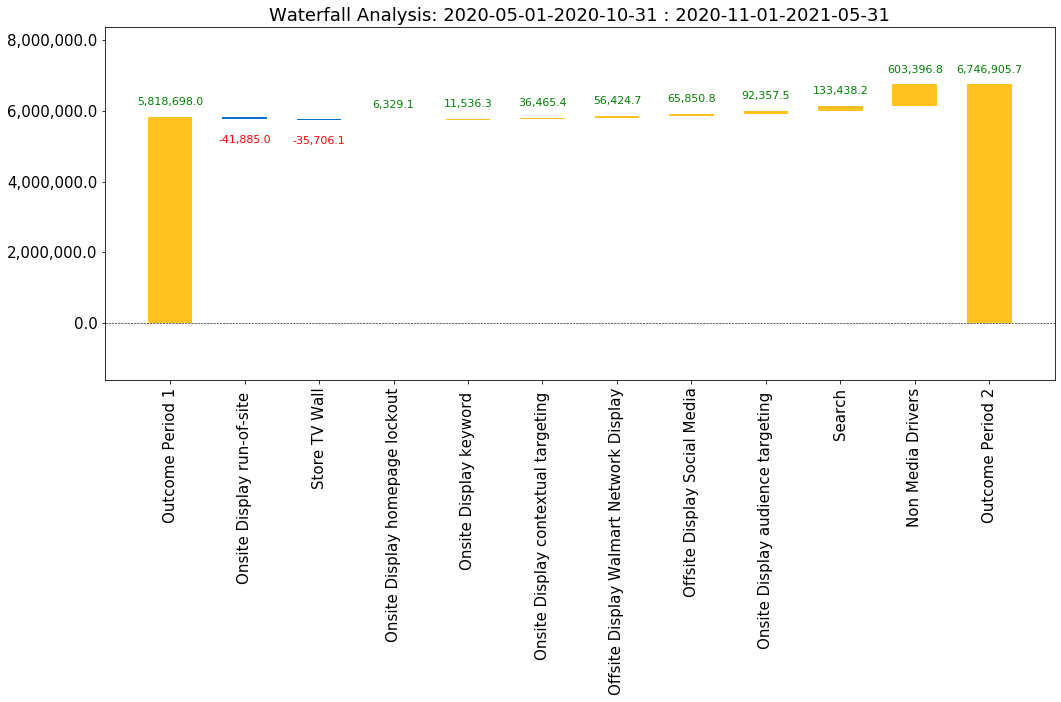

Contribution Period 1  \
Outcome Variable                                 5,818,698.65   
Non Media Drivers                                1,524,529.63   
Offsite Display Social Media                         2,654.58   
Offsite Display Walmart Network Display             51,779.43   
Onsite Display audience targeting                  175,736.31   
Onsite Display contextual targeting                103,657.36   
Onsite Display homepage lockout                      5,671.30   
Onsite Display keyword                              64,882.02   
Onsite Display run-of-site                         165,235.87   
Search                                             223,561.53   
Store TV Wall                                       -1,346.47   

                                        Contribution Period 2      Due To  \
Outcome Variable                                 6,746,907.00  928,208.35   
Non Media Drivers                                1,673,324.47  603,396.85   
Offsite Display Social Media                        68,505.39   65,850.81   
Offsite Display Walmart Network Display            108,204.14   56,424.71   
Onsite Display audience targeting                  268,093.85   92,357.54   
Onsite Display contextual targeting                140,122.79   36,465.43   
Onsite Display homepage lockout                     12,000.35    6,329.05   
Onsite Display keyword                              76,418.31   11,536.28   
Onsite Display run-of-site                         123,350.84  -41,885.04   
Search                                             356,999.73  133,438.21   
Store TV Wall                                      -37,052.61  -35,706.14   

                                        Due To (%) Spend Period 1  \
Outcome Variable                              16.0            nan   
Non Media Drivers                             10.4              0   
Offsite Display Social Media                   1.1            597   
Offsite Display Walmart Network Display        1.0         13,440   
Onsite Display audience targeting              1.6         46,033   
Onsite Display contextual targeting            0.6         12,616   
Onsite Display homepage lockout                0.1          7,222   
Onsite Display keyword                         0.2          5,560   
Onsite Display run-of-site                    -0.7          9,585   
Search                                         2.3        107,328   
Store TV Wall                                 -0.6            417   

                                        Spend Period 2  
Outcome Variable                                   nan  
Non Media Drivers                                    0  
Offsite Display Social Media                    13,881  
Offsite Display Walmart Network Display         32,149  
Onsite Display audience targeting               74,278  
Onsite Display contextual targeting             18,829  
Onsite Display homepage lockout                 21,829  
Onsite Display keyword                           7,737  
Onsite Display run-of-site                       7,083  
Search                                         195,958  
Store TV Wall                                    7,911

In [32]:
model_obj.set_df_input(df_input=df)

output=model_obj.visualize_due_calculations('Manual Model 1', start_period_1= '2020-05-01', end_period_1= '2020-10-31', 
                                     start_period_2= '2020-11-01', end_period_2= '2021-05-31',
                                     media_level= 6,
                                     combine_holidays= False, combine_days_events_mod= False,
                                     combine_seasonaity_terms= False,
                                     combine_all_dummy_variables= False, combine_non_media_drivers= True)

Display Level  Contribution Share (%)  \
0               Onsite Display run-of-site                     15.1   
1                   Onsite Display keyword                      7.4   
2      Onsite Display contextual targeting                     12.8   
3              Offsite Display Social Media                     3.7   
4        Onsite Display audience targeting                     23.3   
5   Offsite Display Walmart Network Display                     8.4   
6                                    Search                    30.4   
7           Onsite Display homepage lockout                     0.9   
8                             Store TV Wall                    -2.0   
9                         Total Incremental                    15.2   
10                                     Base                    84.8   
11                                    Total                   100.0   

   Total Contribution Total Sales ($) Total Spend ($)  Spend Share (%)  \
0             288,587       1,686,979          16,668              2.9   
1             141,300         825,993          13,298              2.3   
2             243,780       1,425,055          31,445              5.4   
3              71,160         415,977          14,478              2.5   
4             443,830       2,594,479         120,311             20.7   
5             159,984         935,209          45,589              7.8   
6             580,561       3,393,763         303,286             52.1   
7              17,672         103,302          29,051              5.0   
8             -38,399        -224,468           8,328              1.4   
9           1,908,475      11,156,291         582,454            100.0   
10         10,657,131      62,297,945               0              0.0   
11         12,565,606      73,454,237         582,454              0.0   

     Raw Media  Raw Media Share (%)  Volume RoAS  Value RoAS ($)  
0    2,990,374                  7.2     1,731.39       10,121.14  
1      834,337                  2.0     1,062.59        6,211.55  
2    3,220,335                  7.7       775.27        4,531.96  
3    2,252,621                  5.4       491.51        2,873.18  
4   11,532,298                 27.6        368.9        2,156.48  
5    8,017,598                 19.2       350.92        2,051.37  
6      203,452                  0.5       191.42         1,119.0  
7    3,579,059                  8.6        60.83           355.6  
8    9,174,739                 21.9      -461.06       -2,695.18  
9   41,804,813                100.0       327.66         1,915.4  
10           0                  0.0          0.0             0.0  
11  41,804,813                  0.0          0.0             0.0

Variable  Total Days  On Air Days  \
0  M_SEARCH_CLK_14_0_0_0_1.960931170220818         396          396   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    396   

   Actual Average Point (Spend)      Average (Spend)  Threshold point (Spend)  \
0                         765.9                765.9                      0.0   

   Inflection Point (Spend)  Saturation Point (Spend)  
0                       0.0                  35,985.7

Variable  Total Days  On Air Days  \
0  M_ON_DIS_AT_IMP_8_2_0_0_1.535680468350162         396          396   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    396   

   Actual Average Point (Spend)      Average (Spend)  Threshold point (Spend)  \
0                         303.8                303.8                      0.0   

   Inflection Point (Spend)  Saturation Point (Spend)  
0                       0.0                  12,121.1

Variable  Total Days  On Air Days  \
0  M_ON_DIS_CT_IMP_6_1_0_0_1.2408015564226482         396          396   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    396   

   Actual Average Point (Spend)      Average (Spend)  Threshold point (Spend)  \
0                          79.4                 79.4                      0.0   

   Inflection Point (Spend)  Saturation Point (Spend)  
0                       0.0                   2,672.2

Variable  Total Days  On Air Days  \
0  M_ON_DIS_KW_IMP_13_2_0_0_0.5035717328988814         396          396   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    396   

   Actual Average Point (Spend)      Average (Spend)  Threshold point (Spend)  \
0                          33.6                 33.6                      0.0   

   Inflection Point (Spend)  Saturation Point (Spend)  
0                       0.0                     625.4

Variable  Total Days  On Air Days  \
0  M_ON_DIS_HPLO_IMP_12_0_0_0_1.613161234595688         396          227   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    227   

   Actual Average Point (Spend)      Average (Spend)  Threshold point (Spend)  \
0                         128.0                 73.4                      0.0   

   Inflection Point (Spend)  Saturation Point (Spend)  
0                       0.0                   6,290.8

Variable  Total Days  On Air Days  \
0  M_ON_DIS_ROS_IMP_10_2_0_0_0.7381605245592329         396          396   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    396   

   Actual Average Point (Spend)      Average (Spend)  Threshold point (Spend)  \
0                          42.1                 42.1                      0.0   

   Inflection Point (Spend)  Saturation Point (Spend)  
0                       0.0                   1,043.5

Variable  Total Days  On Air Days  \
0  M_OFF_DIS_WN_DISPLAY_IMP_5_2_0_0_1.86525118304...         396          396   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    396   

   Actual Average Point (Spend)      Average (Spend)  Threshold point (Spend)  \
0                         115.1                115.1                      0.0   

   Inflection Point (Spend)  Saturation Point (Spend)  
0                       0.0                   5,433.8

Variable  Total Days  On Air Days  \
0  M_OFF_DIS_SMEDIA_IMP_6_0_0_0_0.9671153554493166         396          280   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    280   

   Actual Average Point (Spend)      Average (Spend)  Threshold point (Spend)  \
0                          51.7                 36.6                      0.0   

   Inflection Point (Spend)  Saturation Point (Spend)  
0                       0.0                   1,367.9

Variable  Total Days  On Air Days  \
0  M_INSTORE_TV_WALL_IMP_5_0_0_0_1.355880944995155         396          174   

   Optimal Range Days (%)  Beyond Saturation Days (%)  \
0                   100.0                         0.0   

   Below Inflection Days (%)  Days above Saturation  Days below Saturation  \
0                        0.0                      0                    174   

   Actual Average Point (Spend)      Average (Spend)  Threshold point (Spend)  \
0                          47.9                 21.0                      0.0   

   Inflection Point (Spend)  Saturation Point (Spend)  
0                       0.0                   1,128.6

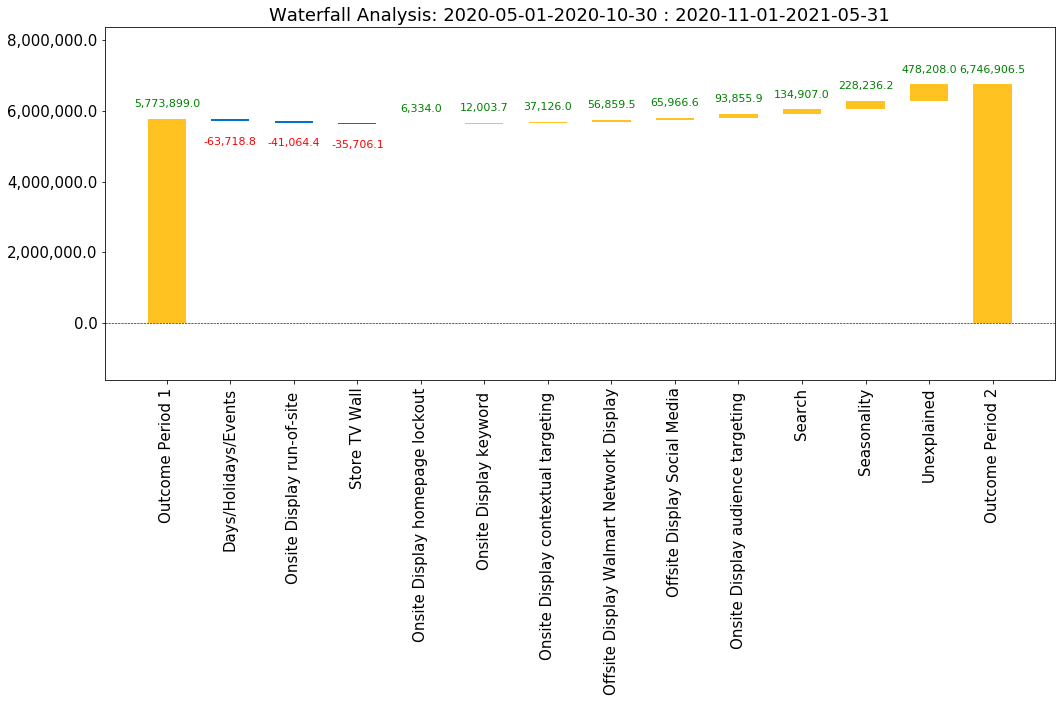

Contribution Period 1  \
Outcome Variable                                 5,773,899.19   
Days/Holidays/Events                                     0.00   
Offsite Display Social Media                         2,538.82   
Offsite Display Walmart Network Display             51,344.62   
Onsite Display audience targeting                  174,237.91   
Onsite Display contextual targeting                102,996.78   
Onsite Display homepage lockout                      5,666.38   
Onsite Display keyword                              64,414.64   
Onsite Display run-of-site                         164,415.23   
Search                                             222,092.69   
Seasonality                                      1,508,807.13   
Store TV Wall                                       -1,346.47   

                                        Contribution Period 2      Due To  \
Outcome Variable                                 6,746,907.00  973,007.81   
Days/Holidays/Events                               -63,718.85  -63,718.85   
Offsite Display Social Media                        68,505.39   65,966.56   
Offsite Display Walmart Network Display            108,204.14   56,859.51   
Onsite Display audience targeting                  268,093.85   93,855.94   
Onsite Display contextual targeting                140,122.79   37,126.01   
Onsite Display homepage lockout                     12,000.35    6,333.98   
Onsite Display keyword                              76,418.31   12,003.67   
Onsite Display run-of-site                         123,350.84  -41,064.39   
Search                                             356,999.73  134,907.05   
Seasonality                                      1,737,043.32  228,236.19   
Store TV Wall                                      -37,052.61  -35,706.14   

                                        Due To (%) Spend Period 1  \
Outcome Variable                              16.9            nan   
Days/Holidays/Events                          -1.1              0   
Offsite Display Social Media                   1.1            523   
Offsite Display Walmart Network Display        1.0         13,371   
Onsite Display audience targeting              1.6         45,691   
Onsite Display contextual targeting            0.6         12,550   
Onsite Display homepage lockout                0.1          7,216   
Onsite Display keyword                         0.2          5,534   
Onsite Display run-of-site                    -0.7          9,543   
Search                                         2.3        106,610   
Seasonality                                    4.0              0   
Store TV Wall                                 -0.6            417   

                                        Spend Period 2  
Outcome Variable                                   nan  
Days/Holidays/Events                                 0  
Offsite Display Social Media                    13,881  
Offsite Display Walmart Network Display         32,149  
Onsite Display audience targeting               74,278  
Onsite Display contextual targeting             18,829  
Onsite Display homepage lockout                 21,829  
Onsite Display keyword                           7,737  
Onsite Display run-of-site                       7,083  
Search                                         195,958  
Seasonality                                          0  
Store TV Wall                                    7,911

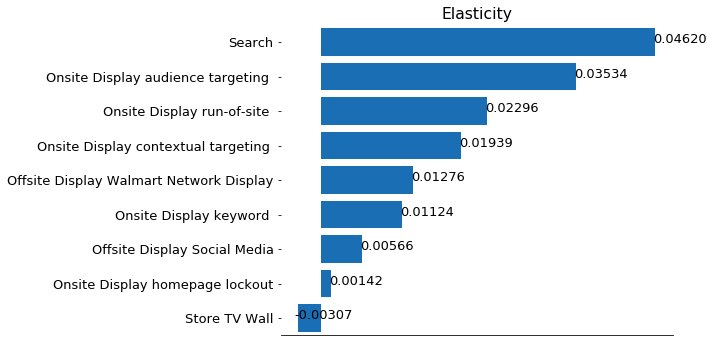

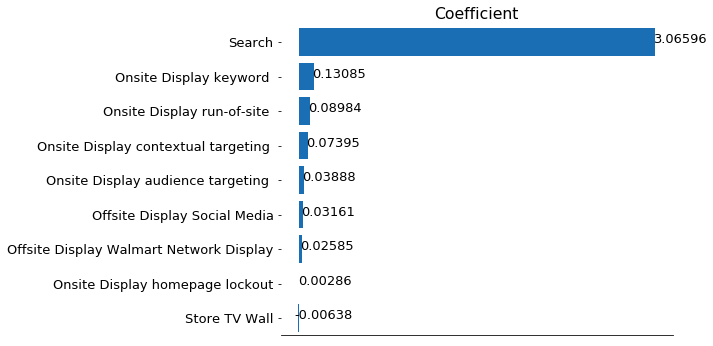

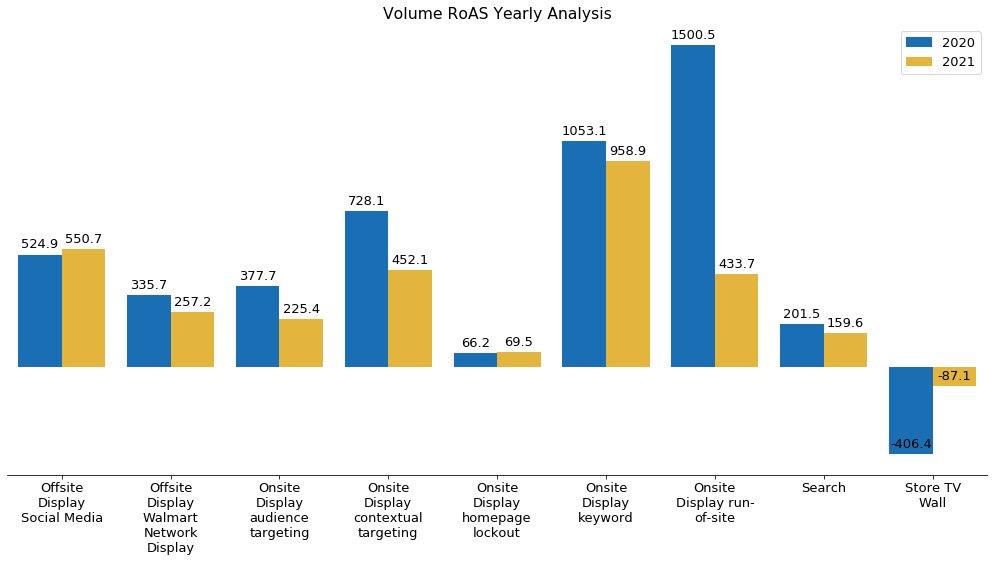

In [33]:
# To save the model outputs
model_obj.save_manual_model('Manual Model 1', folder_name= 'model_results', start_period_1= '2020-05-01', 
                            end_period_1= '2020-10-30', 
                            add_ROAS_for_validation= False,
                            roas_100_multiplication= True,
                            media_vars_plot= media_vars_plot,
                            start_period_2= '2020-11-01', end_period_2= '2021-05-31',
                            year_1= 2020, year_2= 2021)